# Feature correlation

This builds a table that visualizes the pearson correlation between
all pairs of available features.

We use the training set from the random split to generate this data.

In [41]:
import pandas as pd
import simple_featurizer as sf

df = pd.read_csv('../data/query_files9/random_train_df_70_nodup.csv', dtype={'id':str})

feature_cols = sf.get_feature_columns(df.columns)

X = df[feature_cols].values

In [42]:
import scipy.stats as spys
import numpy
import seaborn as sns
import matplotlib.pyplot as plot

def pearson_clustermap(X, feature_cols, fig_size=(15,10)):
    pearson_matrix = numpy.zeros((len(feature_cols), len(feature_cols)))
    for i, f1 in enumerate(feature_cols):
        for j, f2 in enumerate(feature_cols):
            f1_values = X[:,i]
            f2_values = X[:,j]
            pearson, _pvalue = spys.pearsonr(f1_values, f2_values)
            pearson_matrix[i][j] = abs(pearson)

    pearson_df = pd.DataFrame(data=pearson_matrix, columns=feature_cols, index=feature_cols)

    plot.figure(figsize=fig_size)
    ax = sns.clustermap(pearson_df)
    ax.ax_row_dendrogram.set_visible(False)
    ax.ax_col_dendrogram.set_visible(False)

<Figure size 3000x2000 with 0 Axes>

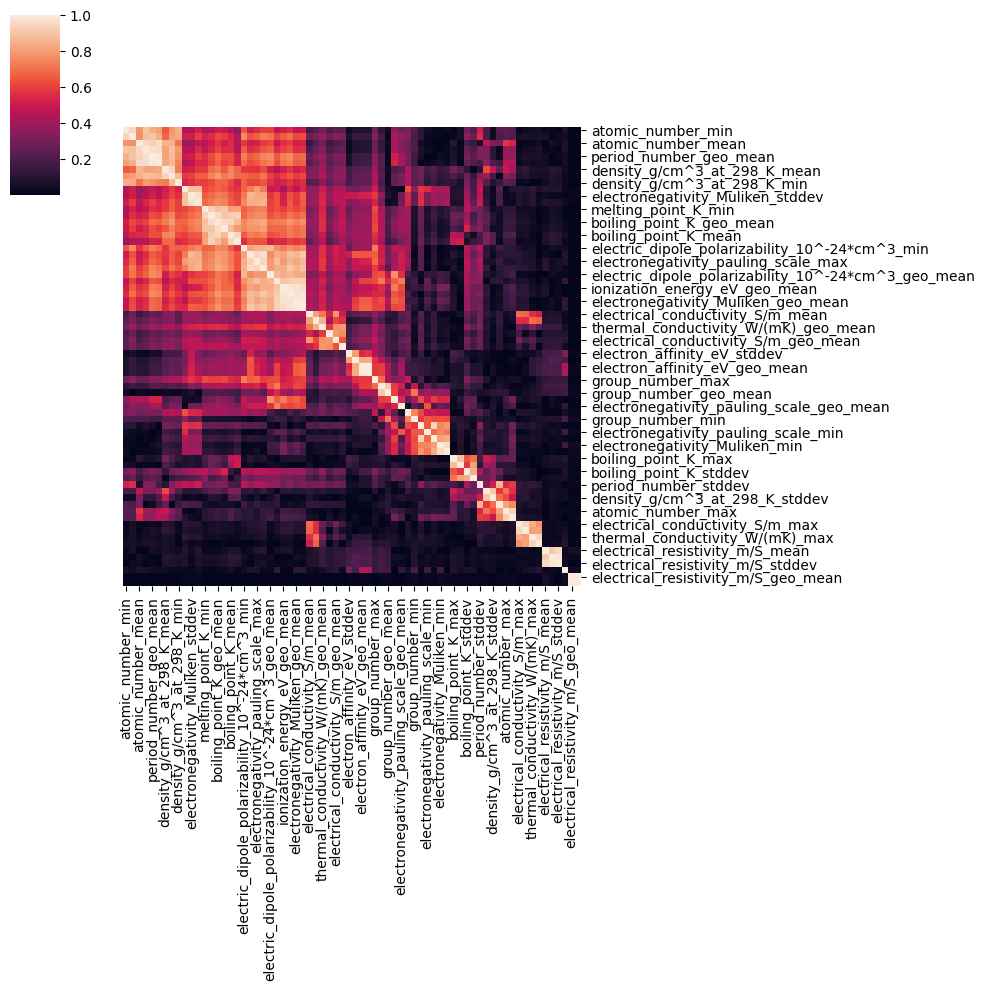

In [43]:
pearson_clustermap(X, [f[2:] for f in feature_cols], fig_size=(30,20))

<Figure size 1500x1000 with 0 Axes>

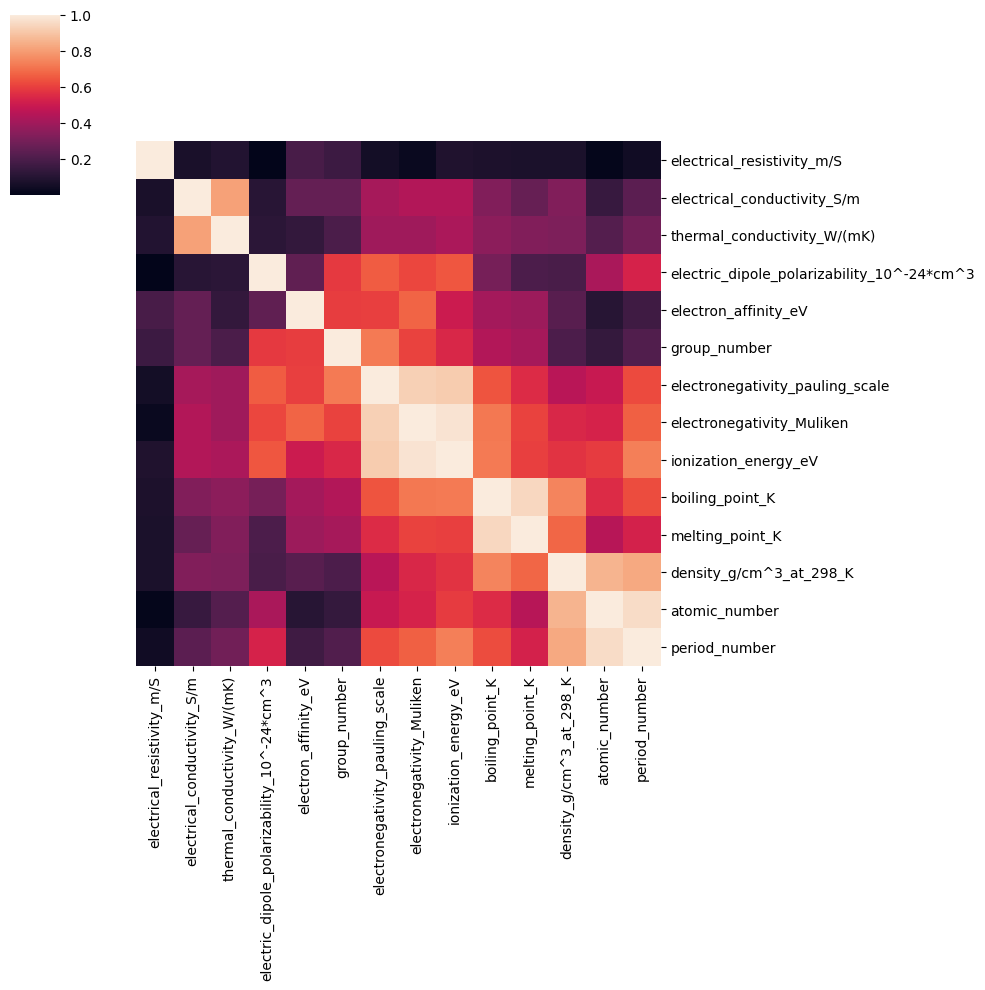

In [46]:
# just using the mean features to find which properties correlate.
mean_cols = [f for f in feature_cols if f.endswith('_mean') and '_geo_mean' not in f]
mean_X = df[mean_cols].values
mean_cols = [f[2:-5] for f in mean_cols]
pearson_clustermap(mean_X, mean_cols)
